<a href="https://colab.research.google.com/github/PiotrPogorzelski01/Praca_dyplomowa/blob/main/Licencjat_prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Temat pracy licencjackiej**:

---


#Z*astosowanie wybranych metod uczenia statystycznego i maszynowego w analizie cen nieruchomości.*

# ***Cel pracy:***

Niniejsza praca ma na celu przeprowadzenie analizy porównawczej efektywności pięciu wybranych algorytmów uczenia maszynowego, które są stosowane do rozwiązywania problemów regresji, czyli przewidywania wartości. Konkretnie, skupię się na problemie przewidywania cen mieszkań w pietnastu polskich miastach, biorąc pod uwagę różne cechy, takie jak powierzchnia, liczba pięter w budynku, lokalizacja, odległość od centrum miasta itd.

Realizacja celu pracy zostanie osiągnięta poprzez opracowanie pięciu modeli regresji, które wykorzystują wybrane algorytmy uczenia mszynowego. Następnie, wyniki uzyskane z tych modeli zostaną poddane szczegółowej analizie porównawczej.

Dodatkowo, praca ma na celu dogłębne zbadanie tematu uczenia maszynowego, różnych jego rodzajów oraz aktualnych zostosowań tej technologii.


## Import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import sklearn as sk
import tensorflow
from statistics import mean, median
import scipy.stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',60)
pd.set_option('display.max_colwidth', -1)

<ipython-input-53-90d11dd09761>:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## *Moim zadaniem jest wybranie najlepszego algorytmu uczenia maszynowego, który przewiduje ceny nieruchomości *

## Dawnload data

W ramach projektu dyplomowego wykorzystałem zbiór danych opublikowany na stronie internetowej Kaggle: https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland .

*Dane zostały podzielone na cztery oddzielne pliki, z których każdy reprezentuje informacje z innego miesiąca roku 2023, obejmująć okres od Sierpnia do Listopada*.

In [ ]:
df_august=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_08.csv")
df_september=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_09.csv")
df_october=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_10.csv")
df_november=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_11.csv")

In [ ]:
# Printing the shapes of DataFrames
print('8:', df_august.shape)
print('9:', df_september.shape)
print('10:', df_october.shape)
print('11:', df_november.shape)

8: (18905, 28)
9: (16997, 28)
10: (16690, 28)
11: (16302, 28)


Łączenie wielu małych zbiorów danych w jeden duży ma kilka zalet dla uczenia maszynowego:

1. Poprawia wydajności modelu, lepiej uogólnia wzorce  
2. Zwiększa dokładność oraz precyzje oszacowania parametrów
3. Większa stabilność modelu
4. Zmniejsza ryzyko overfittingu



In [ ]:
# List containing DataFrames to concatenate
frames = [df_august, df_september, df_october, df_november]

# Concatenating DataFrames
df = pd.concat(frames)

In [ ]:
desc=['numer identyfikacyjny','nazwa miasta','rodzaj budynku','powierzchnia w metrach kwadratowych',
 'liczba pokoi','piętro na którym znajduje się mieszkanie','liczba pięter w budynku','rok wybudowania budunku','szerokość geograficzna',
 'długość geograficzna','dystans od cetrum miasta w km','liczba miejsc, które znajdują się 500m od mieszkania [szkoła,restauracje,apteka,poczta,uczelnia,przedszkole]',
 'dystans do najbliższej szkoły w km','dystans do najbliższej kliniki w km','dystans do najbliższej poczty w km','dystans do najbliższej przedszkola w km','dystans do najbliższej restauracji w km',
 'dystans do najbliższej uczelni w km','dystans do najbliższej apteki w km','rodzaj','materiał budynku','stan mieszkania','jest miejsce parkingowe','jest balkon','jest winda','są kamery ',
 'jest komórka lokatorska','cena']

In [ ]:
pd.DataFrame({"Feature":df.columns,"Description":desc})

,Feature,Description
0,id,numer identyfikacyjny
1,city,nazwa miasta
2,type,rodzaj budynku
3,squareMeters,powierzchnia w metrach kwadratowych
4,rooms,liczba pokoi
5,floor,piętro na którym znajduje się mieszkanie
6,floorCount,liczba pięter w budynku
7,buildYear,rok wybudowania budunku
8,latitude,szerokość geograficzna
9,longitude,długość geograficzna


## Take a look at the Data Structure

In [ ]:
#display the first few rows of a DataFrame.
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [ ]:
df.shape

(68894, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68894 entries, 0 to 16301
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    68894 non-null  object 
 1   city                  68894 non-null  object 
 2   type                  53616 non-null  object 
 3   squareMeters          68894 non-null  float64
 4   rooms                 68894 non-null  float64
 5   floor                 56422 non-null  float64
 6   floorCount            67938 non-null  float64
 7   buildYear             56959 non-null  float64
 8   latitude              68894 non-null  float64
 9   longitude             68894 non-null  float64
 10  centreDistance        68894 non-null  float64
 11  poiCount              68894 non-null  float64
 12  schoolDistance        68825 non-null  float64
 13  clinicDistance        68575 non-null  float64
 14  postOfficeDistance    68799 non-null  float64
 15  kindergartenDistanc

Powyższa tabela reprezentuje nazwy kolumn, ile wartości niepustych mają oraz jaki jest ich typ danych. Liczba 68894 oznacza, że kolumna nie ma żadnych braków danych. Jak widać niektóre kolumny mają puste wartości, więc trzeba je uzupełnić lub usunąć. Kolejnym problemem, którym trzeba będzie się zając jest typ danych kategorialnych (object)

In [ ]:
#statistical information about the numetic columns in our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,68894.0,58.944435,21.279593,25.000000,44.492500,55.000000,69.000000,1.500000e+02
rooms,68894.0,2.685212,0.911641,1.000000,2.000000,3.000000,3.000000,6.000000e+00
floor,56422.0,3.305431,2.506487,1.000000,2.000000,3.000000,4.000000,2.900000e+01
floorCount,67938.0,5.221172,3.270862,1.000000,3.000000,4.000000,6.000000,2.900000e+01
buildYear,56959.0,1984.586527,34.058699,1850.000000,1965.000000,1991.000000,2014.000000,2.023000e+03
latitude,68894.0,52.045462,1.339131,49.978999,51.114026,52.195312,52.440563,5.460646e+01
longitude,68894.0,19.501237,1.781489,14.447127,18.523780,19.899315,20.994734,2.320713e+01
centreDistance,68894.0,4.342607,2.873857,0.020000,1.990000,3.940000,6.120000,1.694000e+01
poiCount,68894.0,20.337460,23.816947,0.000000,7.000000,13.000000,24.000000,2.080000e+02
schoolDistance,68825.0,0.416781,0.479851,0.004000,0.175000,0.290000,0.468000,4.818000e+00


Tabela pokazuję - statystyke opisowa kolumn numerycznych, obejmująca liczbę obserwacji, średnią, odchylenie standardowe, minimum, maksimum oraz wartości kwartylne(25%,50%,75%). Na przykład średnia wartość parametru "squeareMeters" to 59 m^2, przy minimalnej wartości 25 m^2 oraz 50% kwartyl wynoszącym 55 m^2, zwany również medianą. Oznacza to, że 50% danych jest poniżej tej wartości, a 50% jest powyżej niej

## Data Cleaning

In [ ]:
def calculate_missing_data(dataframe):
    """
    This function calculates the total missing values and the percentage of total
    missing values for each column in the provided dataframe.

    Returns:
    DataFrame: A dataframe containing the total missing values and percentage of total
    missing values for each column.
    """
    missing_data_info = []

    for column in dataframe.columns:
        total_missing_values = dataframe[column].isnull().sum()
        percentage_missing_values = round((total_missing_values / dataframe.shape[0]) * 100, 2)

        missing_data_info.append({
            "ColumnName": column,
            "TotalMissingValues": total_missing_values,
            "PercentageMissing": percentage_missing_values,
            "Datatype":dataframe[column].dtype
        })

    missing_data_df = pd.DataFrame(missing_data_info)
    return missing_data_df


missing_data_df = calculate_missing_data(df)

# Display columns with missing values
missing_columns_df = missing_data_df[missing_data_df['PercentageMissing'] > 0.0]
display(missing_columns_df)

print('\n')
print(f"Number of columns with missing values: {missing_columns_df.shape[0]}")

,ColumnName,TotalMissingValues,PercentageMissing,Datatype
2,type,15278,22.18,object
5,floor,12472,18.10,float64
6,floorCount,956,1.39,float64
7,buildYear,11935,17.32,float64
12,schoolDistance,69,0.10,float64
13,clinicDistance,319,0.46,float64
14,postOfficeDistance,95,0.14,float64
15,kindergartenDistance,68,0.10,float64
16,restaurantDistance,193,0.28,float64
17,collegeDistance,2021,2.93,float64




Number of columns with missing values: 14


Tabela zawiera kolumny z pustymi wartościami, informacje o liczbie tych wartości, procentowym udziale pustych wartości w stosunku do ogólnej liczby oraz typ danych dla każdej kolumny

In [ ]:
# Dropping id and columns which have very high number of missing values, being impossible to apply techniques such as imputation
df.drop(['id','type','floor','buildYear','condition','buildingMaterial','ownership'],axis=1,inplace=True)
# Dropping duplicates if any
df=df.dropna()

W mojej pracy zdecydowałem się użyć metody drop() do usunięcia kolumn zawierających puste wartości

In [ ]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
city                    0
squareMeters            0
rooms                   0
floorCount              0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [ ]:
df.shape

(62692, 21)

Po oczyszczeniu danych z wartości pustych. Nasz zbiór danych zawiera 62692 rekordów oraz 21 kolumn

## Discover and Visualize the Data to Gain Insights

In [ ]:
df1=df.copy()

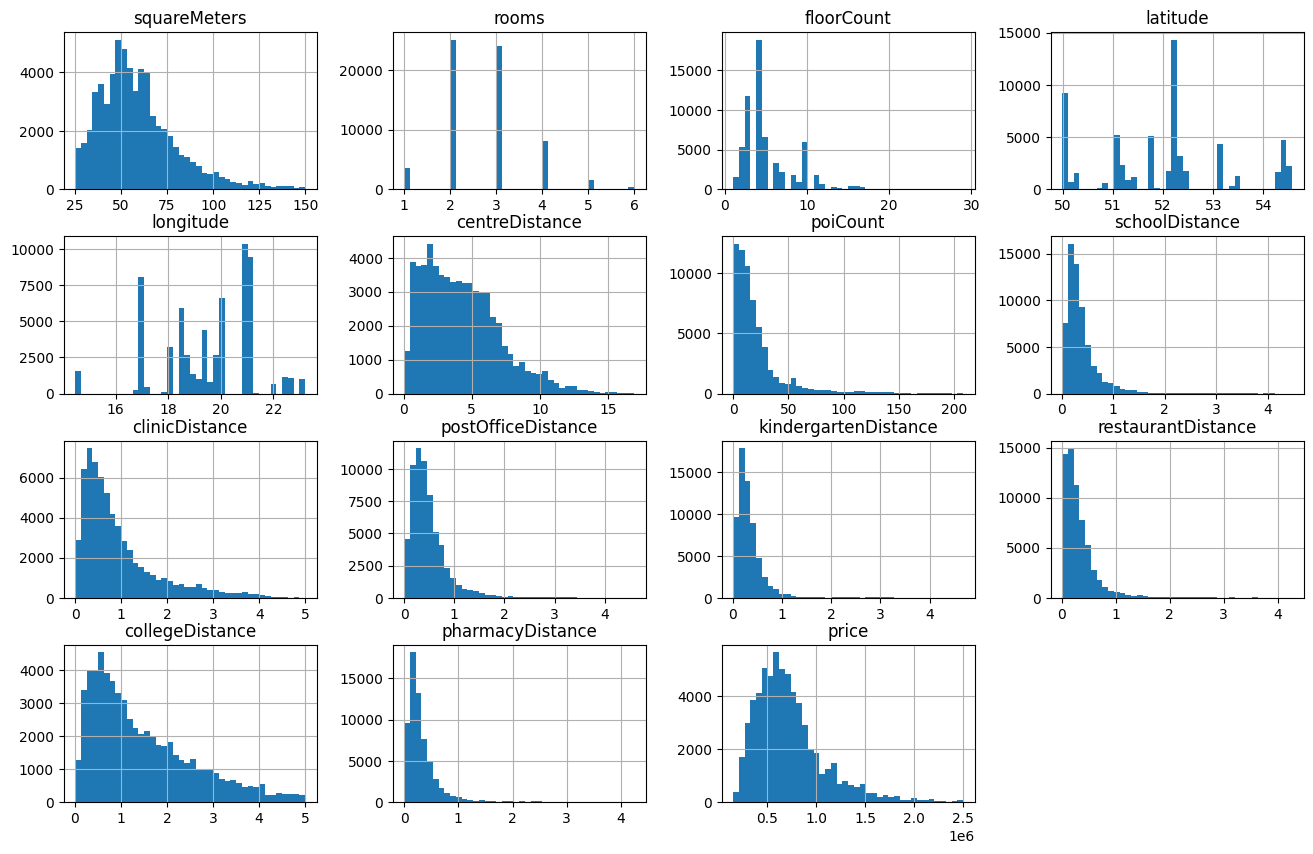

In [ ]:
df1.hist(bins=40,figsize=(16,10))
plt.ticklabel_format(style='plain')
plt.show()

Histogram każdego atrybuty numerycznego, z których możemy wyczytać pewne informację :

*   Kilka z tych atrybutów jest ukazany w odmiennych skalach, nieraz znacznie zróżnicowanych. Zajmiemy się tym zagadnieniem w dalszej części pracy.
*   Wiele histogramów cechuje się prawoskościścią, czyli wartości rozciągają się znacznie bardziej po prawej stronie mediany. Może być to utrudnieniem dla niektórych algorytmów uczenia maszynowego rozpoznawania wzorców. Potem spróbujemy przekształcić te atrybuty w taki sposób, aby ich rozkład był bardziej symetryczny i dzwonowy



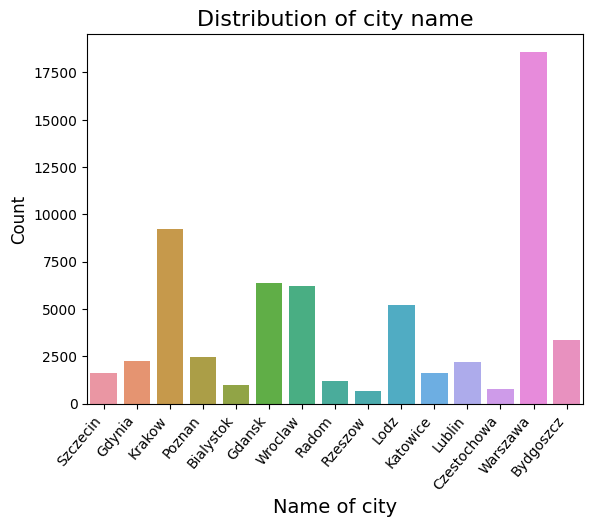

In [ ]:
# Create the plot
sns.countplot(data=df1,x='city')

# Set the title and labels
plt.title('Distribution of city name', fontsize=16)
plt.xlabel('Name of city', fontsize=14)
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=50)

# Modify x-axis tick labels to start with uppercase letter
plt.gca().set_xticklabels([label.get_text().title() for label in plt.gca().get_xticklabels()])

# Move x-axis tick labels to the right
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')

# Show the plot
plt.show()

Wykres słupkowy pokazuję częstotliwość występowania danych dla poszczególnych miast. Najwięcej danych jest z Warszawy(**18599**), a najmniej z Rzeszowa(**679**).Szczecin zajmuje 11 miejsce z (**1595**) danymi. Mamy doczynienia z nierównomiernym rozkładem danych, co może mieć wpływ na jakość modeli predykcyjnych. Algorytmy mogą lepiej radzić sobie z miastami, z których pochodzi więcej danych, ponieważ mają więcej informacji do wykrywania zależności

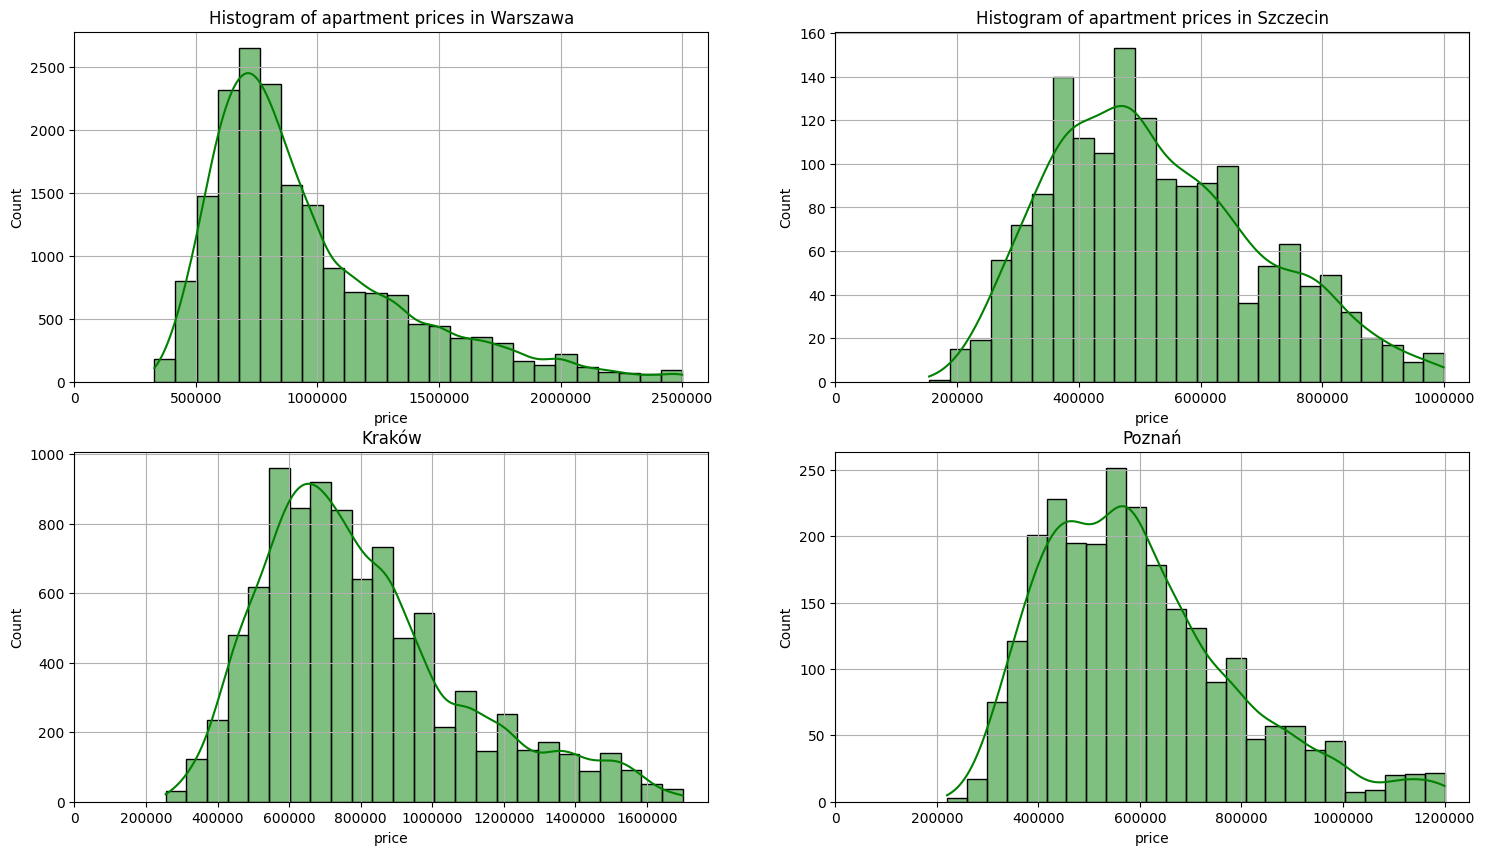

In [ ]:
df_Warszawa=df1[df1['city']=='warszawa']
df_Szczecin=df1[df1['city']=='szczecin']
df_Krakow=df1[df['city']=='krakow']
df_Poznan=df1[df1['city']=='poznan']
# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# First chart
g = sns.histplot(x='price', data=df_Warszawa, bins=25, color='green', kde=True, ax=axs[0,0])
g.set(xlim=(0, None))
g.set_title('Histogram of apartment prices in Warszawa')
g.ticklabel_format(style='plain', axis='x')
g.grid(True)

# Second chart
g1 = sns.histplot(x='price', data=df_Szczecin, bins=25, color='green', kde=True, ax=axs[0,1])
g1.set(xlim=(0, None))
g1.set_title('Histogram of apartment prices in Szczecin')
g1.ticklabel_format(style='plain', axis='x')
g1.grid(True)

g2 = sns.histplot(x='price', data=df_Krakow, bins=25, color='green', kde=True, ax=axs[1,0])
g2.set(xlim=(0, None))
g2.set_title('Kraków')
g2.ticklabel_format(style='plain', axis='x')
g2.grid(True)


g3 = sns.histplot(x='price', data=df_Poznan, bins=25, color='green', kde=True, ax=axs[1,1])
g3.set(xlim=(0, None))
g3.set_title('Poznań')
g3.ticklabel_format(style='plain', axis='x')
g3.grid(True)


plt.show()

Na załączonym obrazie widzimy cztery histogramy przedstawiające rozkład cen mieszkań w czterech różnych polskich miastach: Warszawie, Szczecinie, Krakowie i Poznaniu. Histogramy pokazują liczbę mieszkań (osi pionowej) w różnych przedziałach cenowych (osi poziomej). Histogram dla Szczecina pokazuje, że większość mieszkać ma ceny w zakresie około 300 000 do 500 000 zł.

In [ ]:
def mean_price(df):
    df_mean_price = df1.groupby('city')['price'].mean().round(0)
    i = 0
    while i < len(df_mean_price):
        formatted_price = f'{df_mean_price[i]:,.0f}'.replace(",", ".")
        print(f"Średnia cena, którą musimy zapłacić za mieszkanie w {df_mean_price.index[i]} - {formatted_price}")
        i = i + 1

In [ ]:
mean_price(df)

Średnia cena, którą musimy zapłacić za mieszkanie w bialystok - 451.407
Średnia cena, którą musimy zapłacić za mieszkanie w bydgoszcz - 416.430
Średnia cena, którą musimy zapłacić za mieszkanie w czestochowa - 313.173
Średnia cena, którą musimy zapłacić za mieszkanie w gdansk - 772.869
Średnia cena, którą musimy zapłacić za mieszkanie w gdynia - 673.507
Średnia cena, którą musimy zapłacić za mieszkanie w katowice - 482.980
Średnia cena, którą musimy zapłacić za mieszkanie w krakow - 802.260
Średnia cena, którą musimy zapłacić za mieszkanie w lodz - 423.080
Średnia cena, którą musimy zapłacić za mieszkanie w lublin - 521.770
Średnia cena, którą musimy zapłacić za mieszkanie w poznan - 595.014
Średnia cena, którą musimy zapłacić za mieszkanie w radom - 339.342
Średnia cena, którą musimy zapłacić za mieszkanie w rzeszow - 523.286
Średnia cena, którą musimy zapłacić za mieszkanie w szczecin - 528.102
Średnia cena, którą musimy zapłacić za mieszkanie w warszawa - 957.715
Średnia cena, którą

In [ ]:
df1['PriceSquareMeter']=round(df1['price']/df1['squareMeters'],0)
df_city=pd.DataFrame(df1.groupby('city')['PriceSquareMeter'].mean().round(0)).reset_index()
df_city.columns=['City','PriceSquareMeter']
df_city=df_city.sort_values(by='PriceSquareMeter',ascending=False)

In [ ]:
df_city

,City,PriceSquareMeter
13,warszawa,16043.0
6,krakow,14309.0
3,gdansk,13562.0
14,wroclaw,11924.0
4,gdynia,11453.0
9,poznan,10154.0
11,rzeszow,9628.0
8,lublin,8844.0
0,bialystok,8501.0
12,szczecin,8277.0


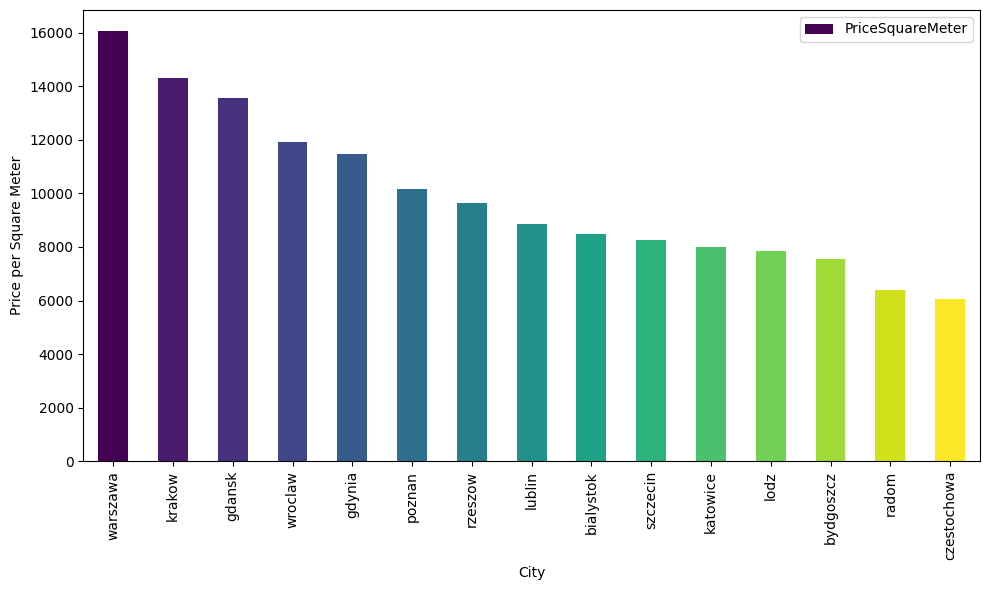

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(df_city)))

fig, ax = plt.subplots(figsize=(10, 6))

df_city.plot(kind='bar',x='City',y='PriceSquareMeter',ax=ax,color=colors )

ax.set_ylabel('Price per Square Meter')
ax.set_xlabel('City')
plt.tight_layout()
plt.show()

Powyższy wykres pokazuję średnie ceny z metra kwadratowego dla poszczegółnych miast w Polsce.

In [ ]:
df1.drop('PriceSquareMeter',axis=1,inplace=True)

## Looking for Correlations

Korelacja pearsona jest to metoda statystyczna służąca do oceny liniowej zależności między dwoma zmiennymi. Wartość korealacji Persona mieści się w zakresie od -1 do 1, co pozwala na określenie kierunku i siły związku między zmiennymi.

Korelacja Persona może przyjmować trzy formy:

1.   Pozytywna korealacja: Obie zmienne zmieniają się w tym samym kierunku - gdy wartość jest dodatnia
2.   Neutralna korealacja: Brak związku między zmiennymi - gdy korealacja wynosi 0
3.   Negatywna korelacja: Zmienne zmieniają się w przeciwnych kierunkach - gdy wartość jest ujemna



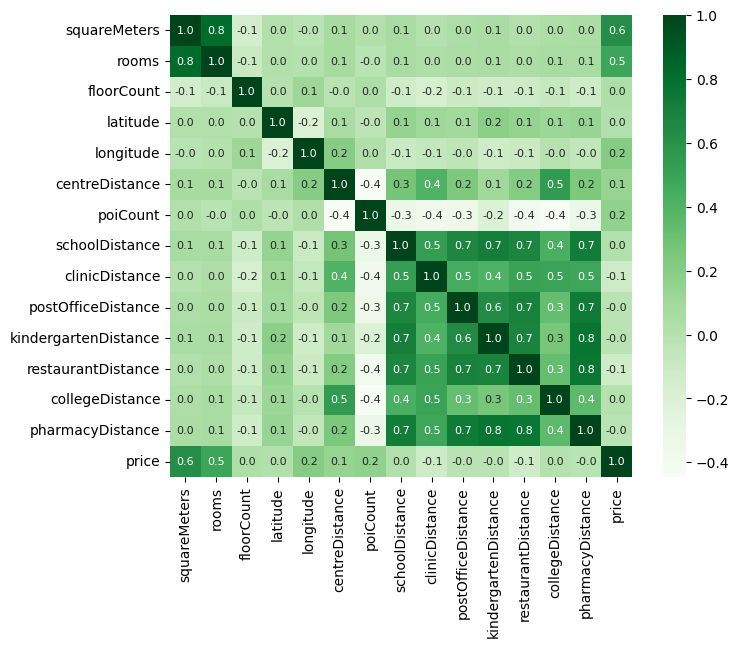

In [ ]:
# Set the size of the figure
plt.figure(figsize=(8,6))

# Compute the correlation matrix from the DataFrame
df_corr=df1.select_dtypes(include=['int64','float64']).corr()

# Define the properties for the heatmap
heatmap_properties = {
    'cbar': True,  # Show a colorbar
    'square': True,  # Each cell will be square-shaped
    'fmt': '.1f',  # Format the annotation to one decimal place
    'annot': True,  # Annotate the cells with their values
    'annot_kws': {'size': 8},  # Increase the annotation size for better visibility
    'cmap': 'Greens'  # Use the Greens color map
}

# Create the heatmap
sns.heatmap(df_corr, **heatmap_properties)

# Show the plot
plt.show()

Macierz korelacji - jest to tabela ukazująca związki  między zmiennymi liczbowymi w naszym zbiorze danym. Możemy zauważyć silną dodatnią korealację w przypadku zmiennych określających odległość od określonych miejsc.Na przykład, korelacja między zmienną "schoolDistance"  a "restaurantDistance"  wynosi 0,7, co sugeruje, że wzrost odległości do szkoły zwykle wiąże się ze wzrostem odległości do restauracji. Innym przykładem silnej korelacji liniowej jest związek między "rooms" a "squareMeters", która wynosi 0.8, co wskazuje, że mieszkanie z wiekszą ilością pokoi mają większą powierzchnię.

In [ ]:
# Selecting numeric columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64'])

# Check if 'price' column exists in the DataFrame
if 'price' in df1.columns:
    # Calculate correlation of numeric columns with 'price'
    correlation = numeric_cols.corrwith(df1['price'])
    print(correlation.sort_values(ascending=False))
else:
    print("'price' column not found in the DataFrame.")

price                   1.000000
squareMeters            0.626307
rooms                   0.486787
longitude               0.207860
poiCount                0.167070
centreDistance          0.140046
floorCount              0.030160
latitude                0.013894
schoolDistance          0.012708
collegeDistance         0.007086
pharmacyDistance       -0.011996
postOfficeDistance     -0.019892
kindergartenDistance   -0.019975
clinicDistance         -0.116064
restaurantDistance     -0.129744
dtype: float64


Przyjrzyjmy się bliżej korelacji, jaka występuje między zmienną zależną(price) a zmiennymi niezależnymi. Najmociejsza dodatnia korelacja występuje między zmienną "squareMeters" i wynosi 0.62. Oznacza to, że większa powierzchnia nieruchomości wiąże się z wyższą ceną. Trzeba pamiętać, że  nie jest to reguła bez wyjątków i mogą występować odchylenia od tej reguły.Z kolei, najwieksza negatywna zależność występuje dla parametru "restaurantDistance" i wynosi -0.13. Oznacza to, gdy dystans do restauracji rośnie, cena w PLN nieznacznie maleje. Jednak, ta zależność jest słaba i może być przypadkowa

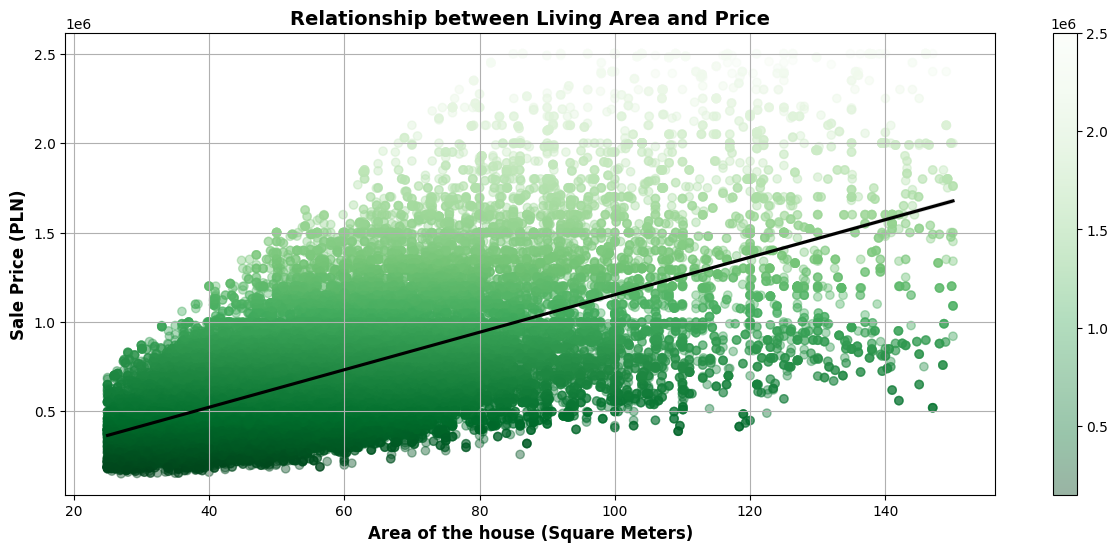

In [ ]:
plt.figure(figsize=(15,6))

# Creating a scatter plot of area vs price
scatter = plt.scatter(x='squareMeters', y='price', data=df, c='price', cmap='Greens_r', alpha=0.4)

# Adding a color bar
plt.colorbar(scatter)

# Adding a regression line
sns.regplot(x='squareMeters', y='price', data=df, scatter=False, color='black')

# Setting the title of the plot
plt.title('Relationship between Living Area and Price', weight='bold', fontsize=14)

# Setting the label of the x-axis
plt.xlabel('Area of the house (Square Meters)', weight='bold', fontsize=12)

# Setting the label of the y-axis
plt.ylabel('Sale Price (PLN)', weight='bold', fontsize=12)

# Adding a grid
plt.grid(True)

# Displaying the plot
plt.show()

Wykres przedstawia korelację pomiędzy powierzchnią a ceną nieruchomości. Czarna linia reprezentuje najlepsze dopasowanie i ogólny trend relacji pomiędzy zmiennymi. Wraz ze wzrostem metrów kwadratowych, obserwujemy również wzrost ceny mieszkania.

## Log Transform for Skewed Features

Teraz zajmniejmy się tak zwanym "Data skewness", jest to miara tego, jak bardzo rozkład prawdopodobieństwa zmiennej odbiega od rozkładu normalnego. Czyli określa stopień, w jakim dane są nierównomiernie rozłożone.

In [ ]:
df2=df1.copy()

In [ ]:
#It computes the absolute value of the skewness for each feature
skew_df=pd.DataFrame(df2.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature:scipy.stats.skew(df2[feature]))
skew_df['Absolute Skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute Skew'].apply(lambda x: True if x>1 else False)
skew_df=skew_df[skew_df['Feature']!='price']
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,squareMeters,1.158897,1.158897,True
1,rooms,0.625132,0.625132,False
2,floorCount,1.790760,1.790760,True
3,latitude,0.258634,0.258634,False
4,longitude,-0.527382,0.527382,False
5,centreDistance,0.848522,0.848522,False
6,poiCount,2.808409,2.808409,True
7,schoolDistance,3.814336,3.814336,True
8,clinicDistance,1.679580,1.679580,True
9,postOfficeDistance,2.982687,2.982687,True


Jeżeli wartość bezwzględna asymetrii rozkładu, reprezentowana w kolumnie "Absolute Skew", przekrasza 1, powinniśmy poddać daną zmienną transformacji. Celem jest doprowadzenie do sytuacji, w której rozkład prawdopodobieństwa tej zmiennej będzie jak najbardziej zbliżony do rozkładu symetrycznego

*  skewness=0 : rozkład symetryczny
*  skewness>0 : prawa skośność
*  skewness<0 : lewa skośność








In [ ]:
# Iterate through each column in skew_df where the 'Skewed' column is True
for column in skew_df.query('Skewed==True')['Feature'].values:
    # Apply a logarithm transformation (using np.log1p) to the corresponding column in df3
    df2[column] = np.log1p(df2[column])

Do transformacji zmiennych zależnych użyłem funkcji log1p, która zwraca wartość logarytmu naturalnego z liczby powiększonej o 1

## Handling Text and Categorical Attributes

Aby wykorzystać dane kategorialne w algorytmach uczenia maszynowego, które działają na danych liczbowych, musimy je najpierw zamienić na wartości numeryczne

In [ ]:
df3=df2.copy()

In [ ]:
df3.select_dtypes(include=['object']).describe()

,city,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
count,62692,62692,62692,62692,62692,62692
unique,15,2,2,2,2,2
top,warszawa,no,yes,no,no,no
freq,18599,45699,37426,33029,55867,32420


W naszym zbiorze danych mamy 6 parametrów tekstowych do transformacji:

*   "City" - 15 kategorii
*   "hasParkingSpace","hasBalcony","hasElevator", hasSecurity", "hasStorageRoom" - 2 kategorie ('yes','no')

Do kodowania zmiennych kategorycznych użyłem funkcji "OneHotEncoder" dostępnej w bibliotece sklearn. Jest to technika stosowana do przekształcania zmiennych kategorycznych na formę numeryczną, którą można dostarczyć algorymom uczenia mszynowego. Proces ten polega na przypisywaniu wartości numerycznej 1 dla wybranej kategorii, na przykład 'Warszawy' i 0 dla pozostałych kategorii, czyli innych nazw miast


In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# Create an instance of OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit the OneHotEncoder to the 'city' column of the dataframe and transform it
# The transformed data is stored in one_hot_encoded1
one_hot_encoded1 = one_hot_encoder.fit_transform(df3[['city']])

# Create a new dataframe from one_hot_encoded1 with columns set to the categories of the 'city' column
# Reset the index of the new dataframe
one_hot_df = pd.DataFrame(one_hot_encoded1, columns=one_hot_encoder.categories_[0]).reset_index(drop=True)

# Reset the index of the orginal dataframe
df3=df3.reset_index(drop=True)

# Concatenate the orginal df and one-hot encoded dataframe
df4=pd.concat([df3,one_hot_df],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one_hot_encoded3 = one_hot_encoder.fit_transform(df3[['hasParkingSpace']])
df5 = pd.concat([df4, pd.DataFrame(one_hot_encoded3, columns=one_hot_encoder.categories_[0])], axis=1)
df5.rename(columns = {'no':'NoParkingSpace'}, inplace = True)
df5.rename(columns = {'yes':'YesParkingSpace'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one_hot_encoded4 = one_hot_encoder.fit_transform(df[['hasElevator']])
df6 = pd.concat([df5, pd.DataFrame(one_hot_encoded3, columns=one_hot_encoder.categories_[0])], axis=1)
df6.rename(columns = {'no':'NoElevator'}, inplace = True)
df6.rename(columns = {'yes':'HaveElevator'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one_hot_encoded5 = one_hot_encoder.fit_transform(df[['hasBalcony']])
df7= pd.concat([df6, pd.DataFrame(one_hot_encoded5, columns=one_hot_encoder.categories_[0])], axis=1)
df7.rename(columns = {'no':'NoBalcony'}, inplace = True)
df7.rename(columns = {'yes':'HasBalcony'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one_hot_encoded6 = one_hot_encoder.fit_transform(df[['hasSecurity']])
df8 = pd.concat([df7, pd.DataFrame(one_hot_encoded6, columns=one_hot_encoder.categories_[0])], axis=1)
df8.rename(columns = {'no':'NoSecurity'}, inplace = True)
df8.rename(columns = {'yes':'HasSecurity'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
one_hot_encoded7 = one_hot_encoder.fit_transform(df[['hasStorageRoom']])
df9 = pd.concat([df8, pd.DataFrame(one_hot_encoded7, columns=one_hot_encoder.categories_[0])], axis=1)
df9.rename(columns = {'no':'NoStorageRoom'}, inplace = True)
df9.rename(columns = {'yes':'HasStorageRoom'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df9.drop(['NoStorageRoom','NoSecurity','NoBalcony','NoElevator','NoParkingSpace'], axis=1, inplace=True)

In [ ]:
df9.shape

(62692, 41)

In [ ]:
df9.head(10)

,city,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,bialystok,bydgoszcz,czestochowa,gdansk,gdynia,katowice,krakow,lodz,lublin,poznan,radom,rzeszow,szczecin,warszawa,wroclaw,YesParkingSpace,HaveElevator,HasBalcony,HasSecurity,HasStorageRoom
0,szczecin,3.610918,2.0,2.397895,53.442692,14.559690,2.15,2.833213,0.241376,0.400118,0.501987,0.255417,0.298622,0.877134,0.186480,no,yes,yes,no,yes,395995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,szczecin,4.304335,3.0,1.386294,53.452222,14.553333,3.24,2.302585,0.242946,0.514021,0.312619,0.219938,0.262364,1.049772,0.246860,no,no,no,no,no,565000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,szczecin,4.484132,3.0,1.386294,53.435100,14.532900,2.27,3.496508,0.161268,0.230318,0.201307,0.306749,0.096219,0.270027,0.083422,yes,yes,no,no,yes,640000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,szczecin,4.204693,3.0,1.386294,53.410278,14.503611,4.07,0.693147,0.197210,0.989541,0.408128,0.532978,0.406132,1.143586,0.414755,no,no,no,no,no,759000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,szczecin,4.163560,3.0,1.609438,53.463100,14.572800,4.48,2.397895,0.076035,0.799307,0.552159,0.231112,0.742889,0.319907,0.556755,yes,yes,no,no,yes,499000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
5,szczecin,3.880532,2.0,2.397895,53.450232,14.562625,2.99,2.944439,0.282921,0.320633,0.210261,0.232698,0.218332,1.006497,0.244514,no,no,yes,no,yes,370000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,szczecin,4.112184,2.0,1.609438,53.454685,14.551520,3.53,2.197225,0.452349,0.578858,0.266203,0.361165,0.228728,1.080109,0.144100,no,yes,yes,no,no,629000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,szczecin,3.886910,2.0,2.564949,53.458869,14.536403,4.27,1.945910,0.296394,0.418710,0.289680,0.405465,0.235072,1.057443,0.350657,no,yes,yes,no,yes,399000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,szczecin,4.291692,4.0,1.386294,53.435092,14.559612,1.30,3.135494,0.208639,0.256191,0.304539,0.263133,0.181488,0.502592,0.181488,yes,no,no,no,yes,325000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,szczecin,4.572440,4.0,1.609438,53.432222,14.555833,1.04,3.871201,0.159565,0.286682,0.009950,0.231905,0.060154,0.406132,0.114221,no,no,no,no,yes,649000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Scaling

Jak mogliśmy wcześniej zauważyć, nasze zmienne zależne są mierzone w różnych jednostkach i różnią się zakresami.

1.   squateMeter -(25-150) m^2
2.   Distance - (0-15) m
3.   pointCount -(0-200) ilość

Aby uniknąć sytuacji, w której jedna cecha dominuje nad inną i będzie miała większy wpływ na cenę mieszkania, tylko dlatego, że ma większe wartości, powinniśmy przekształcić cechy do porównywalnych skal, stosująć standaryzację.

Standaryzacja to metoda przetwarzania danych używana w uczeniu maszynowym. Jej celem jest przekształcenie cechy danych tak, aby ich średnia wynosiła 0, a odchylenie standardowe 1.



In [ ]:
df10=df9.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df10.drop('price',axis=1,inplace=True)

In [ ]:
df10=df10.select_dtypes(include=['float64','int64'])

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(df10)
# Transform the data using the fitted scaler and store it in a DataFrame
df10 = pd.DataFrame(scaler.transform(df10), index=df10.index, columns=df10.columns)

In [ ]:
df10.head()

,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,bialystok,bydgoszcz,czestochowa,gdansk,gdynia,katowice,krakow,lodz,lublin,poznan,radom,rzeszow,szczecin,warszawa,wroclaw,YesParkingSpace,HaveElevator,HasBalcony,HasSecurity,HasStorageRoom
0,-1.264791,-0.754771,1.446892,1.074731,-2.829606,-0.754080,0.232364,-0.284549,-0.509949,0.567930,-0.097739,0.187153,0.163605,-0.382236,-0.125755,-0.237335,-0.111366,-0.336274,-0.19365,-0.161574,-0.415692,-0.300492,-0.190795,-0.203118,-0.139041,-0.104639,6.201108,-0.649471,-0.331404,-0.609792,-0.609792,0.821640,-0.349521,1.034870
1,0.801182,0.347342,-0.756243,1.081912,-2.833219,-0.362016,-0.283449,-0.277211,-0.201067,-0.260288,-0.275594,0.018526,0.571012,-0.091411,-0.125755,-0.237335,-0.111366,-0.336274,-0.19365,-0.161574,-0.415692,-0.300492,-0.190795,-0.203118,-0.139041,-0.104639,6.201108,-0.649471,-0.331404,-0.609792,-0.609792,-1.217078,-0.349521,-0.966305
2,1.336869,0.347342,-0.756243,1.069010,-2.844832,-0.710917,0.877140,-0.658954,-0.970412,-0.747119,0.159588,-0.754178,-1.269099,-0.878618,-0.125755,-0.237335,-0.111366,-0.336274,-0.19365,-0.161574,-0.415692,-0.300492,-0.190795,-0.203118,-0.139041,-0.104639,6.201108,-0.649471,-0.331404,1.639904,1.639904,0.821640,-0.349521,1.034870
3,0.504306,0.347342,-0.756243,1.050306,-2.861477,-0.063472,-1.847954,-0.490970,1.088451,0.157432,1.293676,0.687155,0.792401,0.717261,-0.125755,-0.237335,-0.111366,-0.336274,-0.19365,-0.161574,-0.415692,-0.300492,-0.190795,-0.203118,-0.139041,-0.104639,6.201108,-0.649471,-0.331404,-0.609792,-0.609792,-1.217078,-0.349521,-0.966305
4,0.381754,0.347342,-0.270265,1.090109,-2.822156,0.084001,-0.190800,-1.057313,0.572574,0.787365,-0.219582,2.253338,-1.151388,1.401206,-0.125755,-0.237335,-0.111366,-0.336274,-0.19365,-0.161574,-0.415692,-0.300492,-0.190795,-0.203118,-0.139041,-0.104639,6.201108,-0.649471,-0.331404,1.639904,1.639904,0.821640,-0.349521,1.034870


## Target Transformation

Przekształcenie zmiennej zależnej, w tym przypadku 'price', za pomocą transformacji matematycznej, jest procesem znanym jako "Target Transformation". Celem tego procesu jest poprawa wydajności modelu.

In [ ]:
target=df['price']

<ipython-input-60-75d35cc3c704>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=scipy.stats.norm)
<ipython-input-60-75d35cc3c704>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)


-----------------------------------------------------------------------------
Średnia cena mieszkań w całym zbiorze danych wynosi: 721170.0 PLN
Mediana cen mieszkań w całym zbiorze danych wynosi: 650000.0 PLN 
-----------------------------------------------------------------------------


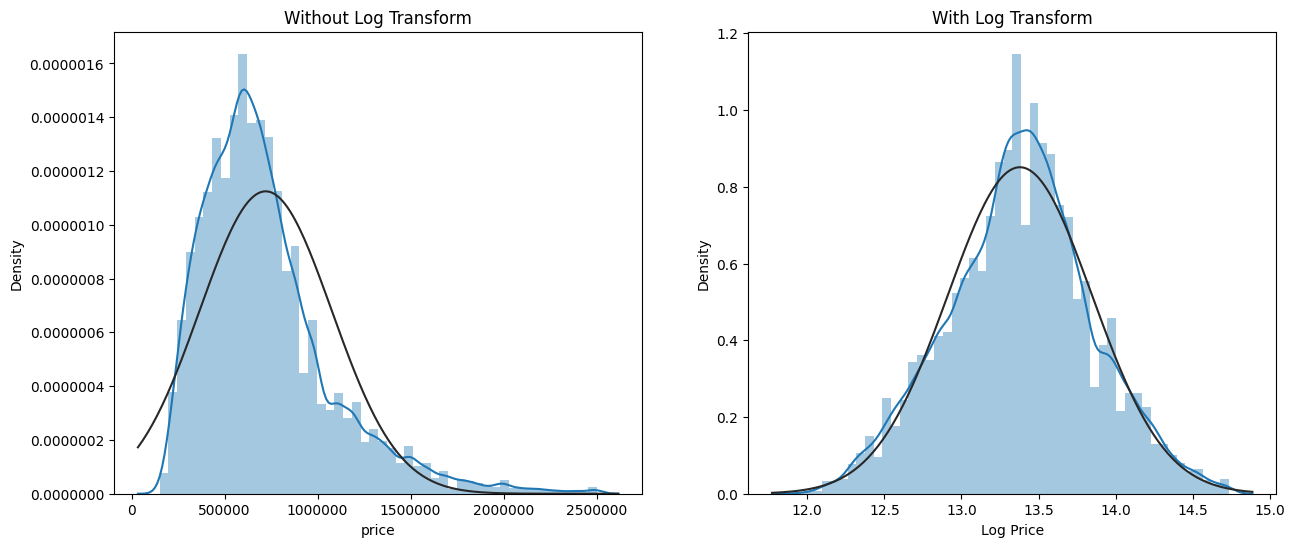

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")
plt.gca().ticklabel_format(style='plain')

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title('With Log Transform')
plt.xlabel('Log Price')
plt.gca().ticklabel_format(style='plain')

print("-----------------------------------------------------------------------------")
print(f'Średnia cena mieszkań w całym zbiorze danych wynosi: {round(mean(target),0)} PLN\nMediana cen mieszkań w całym zbiorze danych wynosi: {median(target)} PLN ')


print("-----------------------------------------------------------------------------")
plt.show()

Na załączonym obrazie widzimy dwa histogramy przedstawiające rozkład zmiennej zależnej 'price'.

1.   Without Log Transform - przedstawia orginaly rozkład danych bez żadnej tranformacji. Rozkład jest prawostronnie skośny, co oznacza, że istnieje długi ogon po prawej stronie rozkładu, gdzie są wyższe ceny mieszkać, lecz jest ich zdecydowanie mniej.
2.   Without Log Transform - przedstawia rozkład cen nieruchomości po zastosowaniu transformacji logarytmicznej. Transformacja ta spowodowała normalizację rozkładu, nadając mu bardziej symetryczny i dzwonowym kształt, zbliżony do rozkładu normalnego. Algorytmy liniowe, które zamierzam zastosować w dalszej części badania, są opracowywane z założeniem normalności rozkładu. Warto również wspomnieć, że rozkład normalny zmniejsza wpływ wartości odstających, które mogą mieć nieproporcjonalnie wpływać na skuteczność modelu


In [ ]:
log_target=np.log(target)

Po dokładnym zbadaniu różnych metod transformacji zmiennej docelowej, zdecydowałem się na zastosowanie logarytmizacji

## Train and Test Sets

Podział zbioru danych na zestaw treningowy i zestaw testowy jest kluczowy do oceny wydajności algorytmów uczenia mszynowego.


*   Training set -to zbiór danych, z których algorytm uczenia maszynowego uczy się, dopasowując parametry modelu. Zestaw ten składa się z przykładów zawierających zarówno zmienne niezależne, jak i zmienną zależną(cel), które pozwalają algorytmowi nauczyć się zależności między nimi
*   Test set -to zbiór danych, który jest używany do oceny wydajności modelu, który został już nauczony na zestawie treningowym. Pozwala to na sprawdzenie, jak dobrze model generalizuje na nowych, nieznanych wcześniej danych.



In [ ]:
df11=df10.copy()

In [ ]:
# Prepare X and y

X=df11
y=log_target
print('Shape of X:', X.shape)
print('Shape od y:',y.shape)

Shape of X: (62692, 34)
Shape od y: (62692,)


In [ ]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("shape of original dataset :", df11.shape)
print("shape of X_train", X_train.shape)
print("shape of y_train", y_train.shape)
print("shape of X_test", X_test.shape)
print("shape of y_test", y_test.shape)

shape of original dataset : (62692, 34)
shape of X_train (50153, 34)
shape of y_train (50153,)
shape of X_test (12539, 34)
shape of y_test (12539,)


 Użyłem funkcji train_test_split do podziału zbioru danych. Ta fukcja podzieliła dane na dwa podzbiory: 80% danych zostało wykorzystane jako zestaw treningowy (train set), natomiast pozostałe 20% jako zestaw testowy(test set)

In [ ]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

## Select and Train a Model

Select and Train a Model - W tej częsci, skupię się na wyborze pięciu różnych algorytmów uczenia maszynowego, które mogą być stosowane do przewidywania cen nieruchomości. Po wyborzę, przeprowadzę trening każdego z nich, a następnie ocenię ich wydajność, korzystając z kilku różnych metryk

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

1.   Mean Absolute Error(MAE) - mierzy ona średnią wartość błedu czyli różnicy między wartościami przewidywanymi przez model a rzeczywistymi wartościami zmiennej
2.   MEAN Squared Error(MSE) - mierzy ocenę błędu średnikwadratowego prognozy. MSE oblicza się jako średnią sumę kwadratów różnic między przewidywanymi wartościami a rzeczywistymi wartościami.Im mniejsza wartość MSE, tym lepsza jest dokładność modelu, ponieważ przewidywania się bliższe rzeczywistym wynikom.
3.  Root Mean Square Erro(RMSE) - mierzy oszacowanie, jak daleko przewidywane wartości ochylają się średnio od rzeczywistych wartości w zestawie danych. RMSE oblicza się jako pierwiastek kwadratowy z MSE. Im niższy współczynnik, tym lepsza jest zdolność modelu do dokładnego przewydywania. Z kolei wyższy RMSE oznacza większe rozbieżności między przewidywanymi a rzeczywistymi wynikami.
4. R2 Score- znazny jako współczynnik determinacji, miara stopnia dopasowania modelu do danych uczących. Wartość R2 miejści się w zakresie od 0 do 1, gdzie :

    *   R2 = 1 wskazuję, że prognozy regresji idealnie dopasowują się do danych
    *   R2 = 0 wskazuje, że model nie wyjaśnia żadnej zmienności zmiennej docelowej

  Wysokie R2 nie wskazuje, czy model regresji jest odpowiedni, ani czy każdy predyktor w modelu jest istotny. Dlatego, ważne jest ocenianie R2 w połączeniu z innymi metrykami.




***Linear Regression ***

Regresja liniowa to metoda statystyczna służąca do przewidywania ceny mieszkania na podstawie jego cech, takich jak (powierzchnia, liczba pięter czy lokalizacja itd). Metoda ta zakłada, że między ceną a tymi cechami istnieje prosty związek, który można przedstawić za pomocą prostej linii na wykresie. Każdy punkt na tym wykresie odpowiada jednemu mieszkaniu. Algorytm regresji liniowej znajduje taką linię, która najlepiej pasuje do dostępnych danych, minimalizując różnice między cenami przewidywanymi przez model a rzeczywistymi cenami sprzedaży mieszkań. Dzięki temu możemy nie tylko przewidywać ceny, ale także zrozumieć, które cechy mieszkania mają największy wpływ na ich wartość.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     7118.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:56:41   Log-Likelihood:                 9780.2
No. Observations:               50153   AIC:                        -1.949e+04
Df Residuals:                   50120   BIC:                        -1.920e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.3787 

Powyższa tabele przedstawia wyniki analizy regresji.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Check if the shapes of X_test and X_test_sm are as expected
if X_test.shape[1] == 37 and X_test_sm.shape[1] == 37:
    # If the shapes match, add a constant to X_test with 'has_constant' parameter set to 'add'
    X_test_sm = sm.add_constant(X_test, has_constant='add')

# Predict using the linear regression model 'lr' on the modified X_test_sm
predictions = lr.predict(X_test_sm)

In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.15813262157613345
MSE: 0.03969070576673777
RMSE: 0.19922526387669254
R2 Score: 0.8193132632960985
------------------------------


<ipython-input-61-be699018c427>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


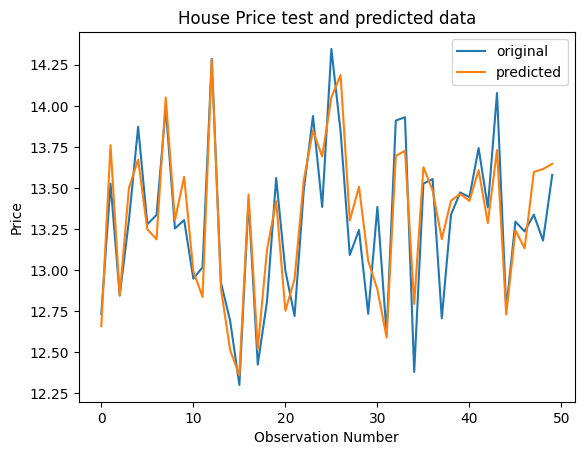

In [ ]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, predictions[:number_of_observations], label="predicted")

plt.title("House Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

Powyższy wykres przedstawia porównanie rzeczywistych cen mieszkań(niebieska linia) z cenami przewidywanymi przez model(pomarańczowa linia), na podstawie danych z 50 różnych mieszkań. W idealnym przypadku, gdyby obie linie były nałożone na siebie, oznaczałoby to, że model przewiduje ceny z absolutną precyzją. Niemniej jednak, linie te nie są identyczne, co sugeruje, że istnieją różnice między cenami przewidywanymi przez model a rzeczywistymi cenami mieszkań.

***Random Forest Regressor***


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)
# Saving feature names for later use
feature_list=list(X.columns)

In [ ]:
#Train the model on training data
rf.fit(X_train,y_train)
# Use the forest's predict method on the test data
predictions=rf.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.0564343214145724
MSE: 0.00851975127902159
RMSE: 0.0923024987691102
R2 Score: 0.9612149487796365
------------------------------


<ipython-input-65-f4b7f77b772d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


**K-Nearest NeighborsRegressor**

In [ ]:
from sklearn import neighbors
from math import sqrt

In [ ]:
rmse_tab=[] # to store rmse values for diffrent k

for K in range(1,30,2):
  model=neighbors.KNeighborsRegressor(n_neighbors=K)

  model.fit(X_train,y_train) #fit the model
  predictions=model.predict(X_test) #make prediction on test set
  error=sqrt(mean_squared_error(y_test,predictions))
  rmse_tab.append(error)
  print('RMSE value for k=',K,'is:',error)

RMSE value for k= 1 is: 0.13814316523719586
RMSE value for k= 3 is: 0.15538735556387154
RMSE value for k= 5 is: 0.16967563414242665
RMSE value for k= 7 is: 0.17743282310250938
RMSE value for k= 9 is: 0.18215819426659016
RMSE value for k= 11 is: 0.1844950206086109
RMSE value for k= 13 is: 0.18683249572018668
RMSE value for k= 15 is: 0.18865308871959854
RMSE value for k= 17 is: 0.1900416519461693
RMSE value for k= 19 is: 0.1911642235482335
RMSE value for k= 21 is: 0.1925722460480277
RMSE value for k= 23 is: 0.1939089242137081
RMSE value for k= 25 is: 0.19510203429972706
RMSE value for k= 27 is: 0.19610846543340488
RMSE value for k= 29 is: 0.1969002905956552


<Axes: >

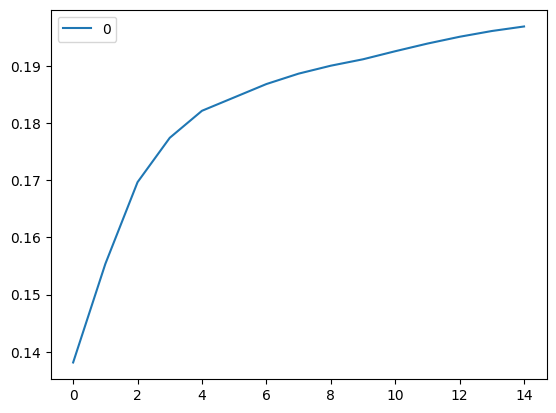

In [ ]:
#plotting the rmse values against k values
plotTable=pd.DataFrame(rmse_tab)
plotTable.plot()

In [ ]:
knn=neighbors.KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train) #fit the model
predictions=knn.predict(X_test) #make prediction on test set


mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "KNeighborsRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)



MAE: 0.062061111830388906
MSE: 0.019083534101751197
RMSE: 0.13814316523719586
R2 Score: 0.9131247118182335
------------------------------


<ipython-input-69-3f0107703aa6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


**Extreme Gradient Boosting**



In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
predictions=xgb_model.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.10399336129148665
MSE: 0.01844277857098162
RMSE: 0.13580419202285923
R2 Score: 0.916041667403759
------------------------------


<ipython-input-70-55b663d18d42>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


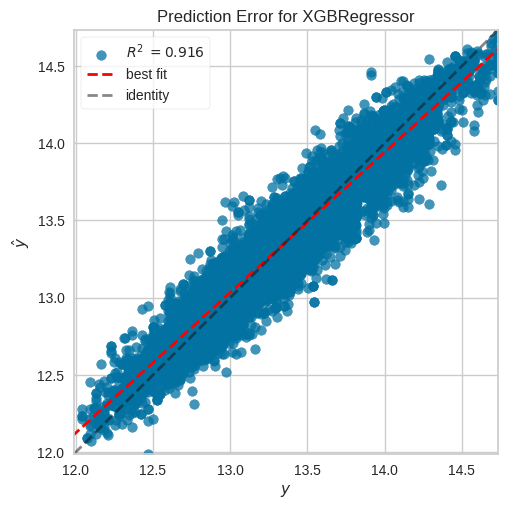

In [ ]:
#Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer=PredictionError(xgb_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.ax.lines[0].set_color('red')

visualizer.poof()
plt.show()

**Neural network**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(50153, 34)

In [ ]:
model = keras.Sequential([
  layers.Dense(30, activation='relu', input_shape=(34,)),
  layers.Dense(30, activation='relu'),
  layers.Dense(1,activation=None)
])


In [ ]:
# Compile the model with the Adam optimizer and the mean squared error loss function
model.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mae'])
# Fit the model to the training data, using the test data for validation
# The model will be trained for 300 epochs, and the batch size for each epoch is 128
history =model.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=300, batch_size=128)

Epoch 1/300
392/392 [==============================] - 2s 4ms/step - loss: 25.7708 - mae: 3.2280 - val_loss: 1.0538 - val_mae: 0.8033
Epoch 2/300
392/392 [==============================] - 1s 2ms/step - loss: 0.6516 - mae: 0.6250 - val_loss: 0.4022 - val_mae: 0.4946
Epoch 3/300
392/392 [==============================] - 1s 3ms/step - loss: 0.2878 - mae: 0.4151 - val_loss: 0.2122 - val_mae: 0.3567
Epoch 4/300
392/392 [==============================] - 1s 2ms/step - loss: 0.1687 - mae: 0.3167 - val_loss: 0.1385 - val_mae: 0.2877
Epoch 5/300
392/392 [==============================] - 1s 2ms/step - loss: 0.1171 - mae: 0.2640 - val_loss: 0.1029 - val_mae: 0.2473
Epoch 6/300
392/392 [==============================] - 1s 2ms/step - loss: 0.0895 - mae: 0.2315 - val_loss: 0.0820 - val_mae: 0.2217
Epoch 7/300
392/392 [==============================] - 1s 2ms/step - loss: 0.0726 - mae: 0.2089 - val_loss: 0.0696 - val_mae: 0.2052
Epoch 8/300
392/392 [==============================] - 1s 3ms/step -

In [ ]:
predictions = model.predict(X_test)


mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "Artificial Neural Network","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

392/392 [==============================] - 1s 2ms/step
MAE: 0.14061593477577233
MSE: 0.03214434614832062
RMSE: 0.1792884439899031
R2 Score: 0.8536670765404218
------------------------------


<ipython-input-76-709ffc63998e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [ ]:
models.sort_values(by='R2 Score', ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
1,RandomForestRegressor,0.056434,0.008520,0.092302,0.961215
3,XGBRegressor,0.103993,0.018443,0.135804,0.916042
2,KNeighborsRegressor,0.062061,0.019084,0.138143,0.913125
4,Artificial Neural Network,0.140616,0.032144,0.179288,0.853667
0,LinearRegression,0.158133,0.039691,0.199225,0.819313


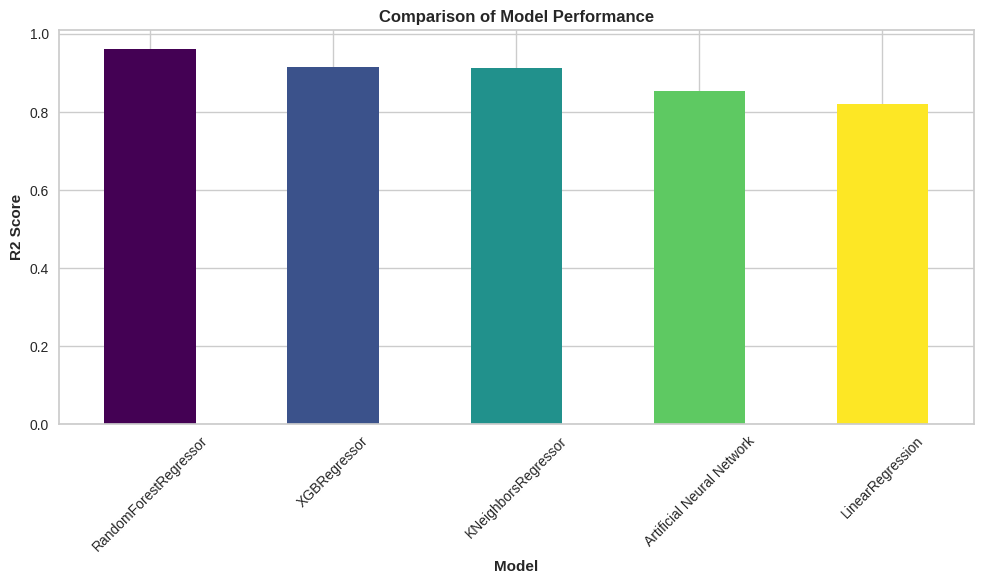

In [ ]:
# Sort ascending by 'R2 Score' and reset the index

fig, ax = plt.subplots(figsize=(10, 6))
sort_model = models.sort_values(by='R2 Score', ascending=False).reset_index()


colors = plt.cm.viridis(np.linspace(0, 1, len(sort_model)))
# We can plot a bar chart for R2 Score to compare the models
sort_model['R2 Score'].plot(kind='bar', ax=ax, color=colors)

# Set titles and labels
ax.set_title('Comparison of Model Performance', weight='bold')
ax.set_ylabel('R2 Score', weight='bold')
ax.set_xlabel('Model', weight='bold')

# Set the x-tick labels to the sorted model names
ax.set_xticklabels(sort_model['Model'], rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()